# Experimental 3 - Filtros Capacitivos

In [1]:
from scipy.signal import butter, lfilter, freqz

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Defining lowpass filter
def butter_lowpass(lowcut, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = lowcut / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a


# Defining highpass filter
def butter_highpass(highcut, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = highcut / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a


# Defining bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

In [3]:
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [4]:
def plot_filter(signal, lowcut, highcut, fs, w, h, filter_type):

    plt.figure(figsize=(22, 3))
    
    if filter_type == 'lowpass':
        
        plt.subplot(1, 2, 1)
        plt.plot(0.5 * fs * w / np.pi, np.abs(h), 'k', label='Gain')
        plt.plot(lowcut, 0.5 * np.sqrt(2), 'bo')
        plt.axvline(lowcut, color='b', linestyle='--', linewidth=2, label=f'Lowcut Frequency: {lowcut} Hz')
        plt.xlim(0, 0.5*fs)
        plt.xticks(np.arange(0, 0.5 * fs + 1, 100))
        plt.title('Lowpass Filter Frequency Response')
        plt.grid()
        plt.ylabel('Gain')
        plt.xlabel('Frequency [Hz]')
        plt.legend(loc='upper right')
        
        y = butter_lowpass_filter(signal, lowcut, fs)
        plt.subplot(1, 2, 2)
        plt.plot(t, signal, 'b-', label='Signal', alpha=.5)
        plt.plot(t, y, 'r--', linewidth=2, label='Lowpass Filtered Signal')
        plt.xlabel('Time [sec]')
        plt.ylabel('Amplitude')
        plt.grid()
        plt.legend(loc='upper right')
        plt.xlim(0, 0.1)
        plt.xticks(np.arange(0, 0.1+0.01, 0.01))
        plt.show()
        
    elif filter_type == 'highpass':
    
        plt.subplot(1, 2, 1)
        plt.plot(0.5 * fs * w / np.pi, np.abs(h), 'k', label='Gain')
        plt.plot(highcut, 0.5 * np.sqrt(2), 'ro')
        plt.axvline(highcut, color='r', linestyle='--', linewidth=2, label=f'Hightcut Frequency: {highcut} Hz')
        plt.xlim(0, 0.5*fs)
        plt.xticks(np.arange(0, 0.5*fs+1, 100))
        plt.title('Lowpass Filter Frequency Response')
        plt.grid()
        plt.ylabel('Gain')
        plt.xlabel('Frequency [Hz]')
        plt.legend(loc='upper right')
        
        y = butter_highpass_filter(signal, highcut, fs)
        plt.subplot(1, 2, 2)
        plt.plot(t, signal, 'b-', label='Signal', alpha=.5)
        plt.plot(t, y, 'r--', linewidth=2, label='Highpass Filtered Signal')
        plt.xlabel('Time [sec]')
        plt.ylabel('Amplitude')
        plt.grid()
        plt.legend(loc='upper right')
        plt.xlim(0, 0.1)
        plt.xticks(np.arange(0, 0.1+0.01, 0.01))
        plt.show()
        
    elif filter_type == 'bandpass':
        
        plt.subplot(1, 2, 1)
        plt.plot((fs * 0.5 / np.pi) * w, abs(h), color='k', label='Gain')
        plt.plot(lowcut, 0.5 * np.sqrt(2), 'bo')
        plt.axvline(lowcut, color='b', linestyle='--', linewidth=2, label=f'Lowcut Frequency: {lowcut} Hz')
        plt.plot(highcut, 0.5 * np.sqrt(2), 'ro')
        plt.axvline(highcut, color='r', linestyle='--', linewidth=2, label=f'Hightcut Frequency: {highcut} Hz')
        plt.xlim(0, 0.5*fs)
        plt.xticks(np.arange(0, 0.5*fs+1, 100))
        plt.title('Bandpass Filter Frequency Response')
        plt.grid()
        plt.ylabel('Gain')
        plt.xlabel('Frequency [Hz]')
        plt.legend(loc='upper right')
        
        y = butter_bandpass_filter(signal, lowcut, highcut, fs)
        plt.subplot(1, 2, 2)
        plt.plot(t, signal, 'b-', label='Signal', alpha=.5)
        plt.plot(t, y, 'r--', linewidth=2, label='Bandpass Filtered Signal')
        plt.xlabel('Time [sec]')
        plt.ylabel('Amplitude')
        plt.grid()
        plt.legend(loc='upper right')
        plt.xlim(0, 0.1)
        plt.xticks(np.arange(0, 0.1+0.01, 0.01))
        plt.show()
    
    else:
        print('Possible filter types: lowpass, highpass and bandpass')

In [5]:
fs = 2000
lowcut = 100
highcut = 200

# Low Pass Filter
b_low, a_low = butter_lowpass(lowcut, fs)
w_low, h_low = freqz(b_low, a_low, worN=8000)

# High Pass Filter
b_high, a_high = butter_highpass(highcut, fs)
w_high, h_high = freqz(b_high, a_high, worN=8000)

# Band Pass Filter
b_band, a_band = butter_bandpass(lowcut, highcut, fs)
w_band, h_band = freqz(b_band, a_band, worN=8000)

# Creating Signal
t = np.linspace(0, 5, int(5 * fs), endpoint=False)

A1, F1 = 1, 50
A2, F2 = 1.5, 150
A3, F3 = 2, 300

signal = A1 * np.sin(2 * np.pi * F1 * t)  \
       + A2 * np.cos(2 * np.pi * F2 * t)  \
       + A3 * np.sin(2 * np.pi * F3 * t)

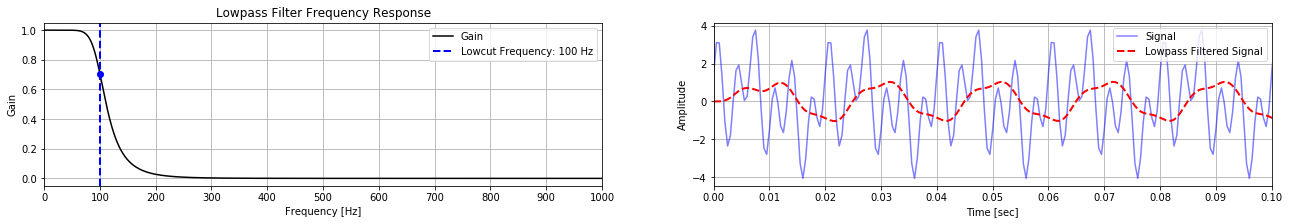

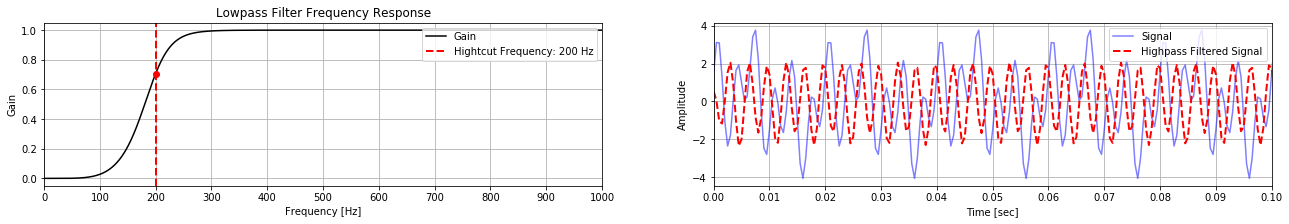

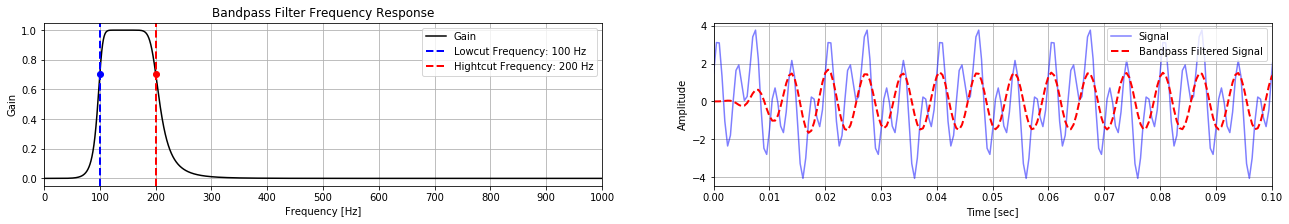

In [6]:
plot_filter(signal, lowcut, highcut, fs, w_low, h_low, 'lowpass')
plot_filter(signal, lowcut, highcut, fs, w_high, h_high, 'highpass')
plot_filter(signal, lowcut, highcut, fs, w_band, h_band, 'bandpass')